In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/raw/heart_cleveland_upload.csv')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [ ]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

scale = 3.
range = 10
size = 100000

X = truncnorm(a=-range/scale, b=+range/scale, scale=scale).rvs(size=size)
X = X.round().astype(int)

In [ ]:
num_feat = ['age', 'trestbps', 'chol', 'thalach	', 'oldpeak']

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


In [48]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [49]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [50]:
df[df['sex']==1].mean()

age           53.965174
sex            1.000000
cp             2.164179
trestbps     130.880597
chol         240.243781
fbs            0.154229
restecg        1.019900
thalach      148.641791
exang          0.373134
oldpeak        1.141294
slope          0.616915
ca             0.736318
thal           1.079602
condition      0.557214
dtype: float64

In [51]:
df[df['sex']==0].mean()

age           55.750000
sex            0.000000
cp             2.145833
trestbps     133.395833
chol         262.229167
fbs            0.125000
restecg        0.947917
thalach      151.604167
exang          0.229167
oldpeak        0.876042
slope          0.572917
ca             0.552083
thal           0.322917
condition      0.260417
dtype: float64

In [52]:
pd.crosstab(df["condition"], df["sex"], margins=True)

sex,0,1,All
condition,,,
0,71,89,160
1,25,112,137
All,96,201,297


<AxesSubplot: xlabel='sex', ylabel='count'>

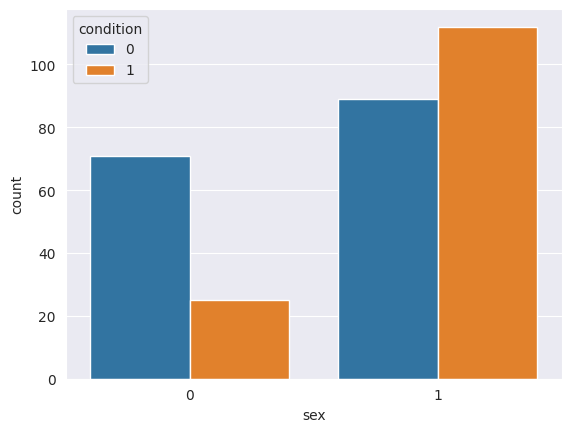

In [53]:
sns.countplot(x='sex', hue='condition', data=df)

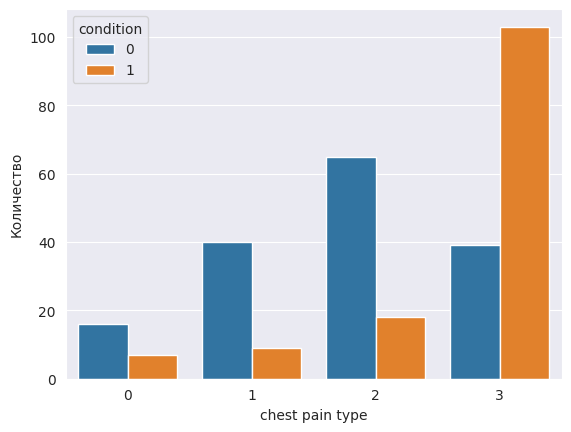

In [54]:
sns.countplot(x='cp', hue='condition', data=df)
plt.xlabel("chest pain type")
plt.ylabel("Количество")
plt.show() 


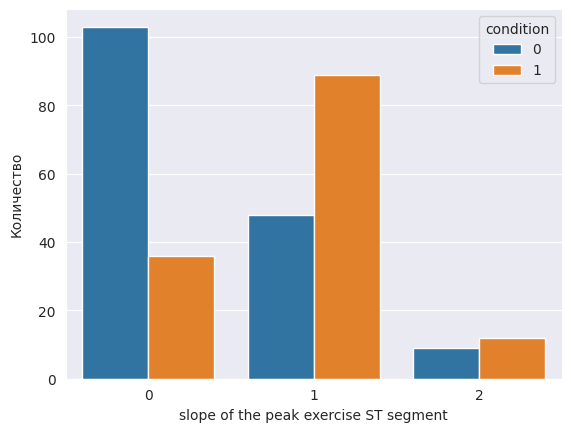

In [55]:
sns.countplot(x='slope', hue='condition', data=df)
plt.xlabel("slope of the peak exercise ST segment")
plt.ylabel("Количество")
plt.show() 

<AxesSubplot: >

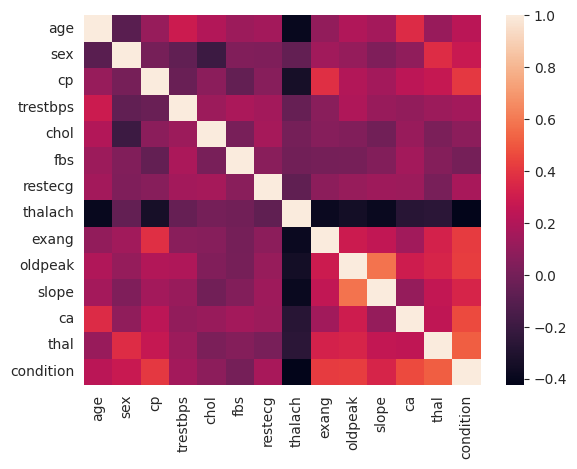

In [56]:
sns.heatmap(df.corr())

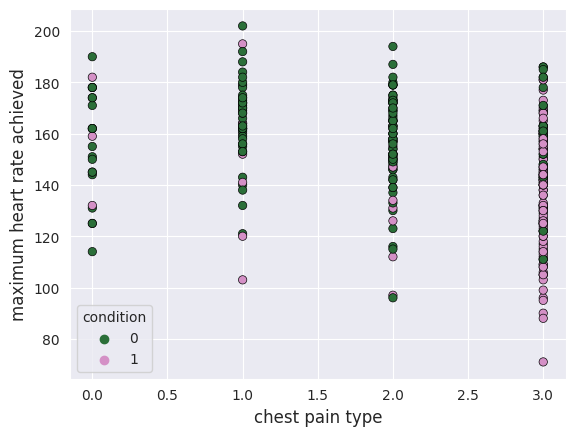

In [64]:
sns.set_style('darkgrid')
plt.xlabel('chest pain type',size=12)
plt.ylabel('maximum heart rate achieved',size=12)
sns.scatterplot(x='cp', y='thalach', data=df, hue='condition', edgecolor='black', palette='cubehelix')
plt.show()

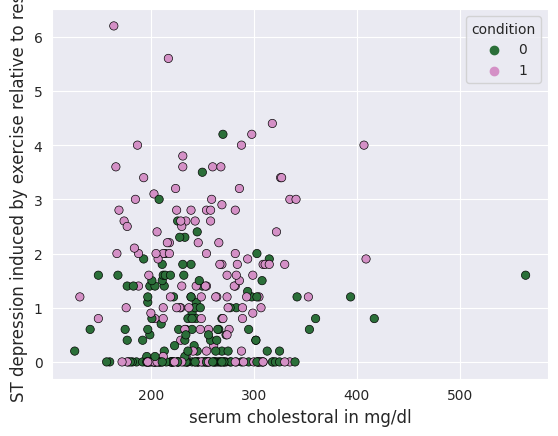

In [65]:
sns.set_style('darkgrid')
plt.xlabel('serum cholestoral in mg/dl',size=12)
plt.ylabel('ST depression induced by exercise relative to rest',size=12)
sns.scatterplot(x='chol', y='oldpeak', data=df, hue='condition', edgecolor='black', palette='cubehelix')
plt.show()

/tmp/ipykernel_4011/3665740410.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=kde_data, shade=True, palette='colorblind')


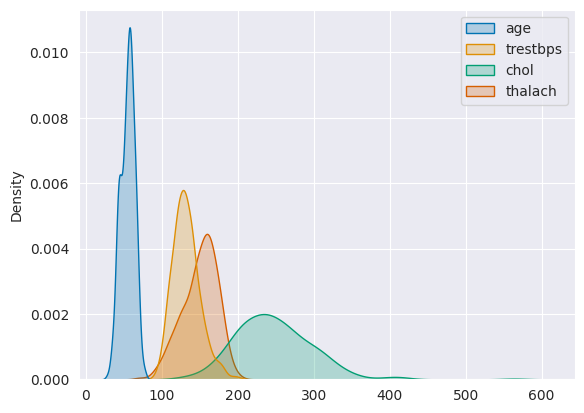

In [95]:
kde_data = df.iloc[:, :-1].drop(['sex', 'fbs', 'exang', 'slope', 'ca', 
'thal', 'cp', 'restecg', 'oldpeak'], axis=1)
 
sns.set_style("darkgrid")
sns.kdeplot(data=kde_data, shade=True, palette='colorblind')
plt.show()  